## News Mood

### Analysis by Jennifer Clarke
---------------------------------------------------------------------------------------
1) I have run this code multiple times and each time there are some News Outlets that dramatically flip sentiment throughout the day and others that stay relatively in the same spot each time. For example CNN and BBC showed great flux in tweet sentiment where as CBS and FOX keep tweet sentiment fairly consistent on the positive side. If I were to take this analysis further I would want to plot out a month or more of tweet polarity values to see if this trend carries over time. 

2) New York Times remains consistently  the most negative in tweet sentiment and CBS remains the most positive in tweet sentiment. When reviewing the tweets sent out by CBS it becomes clear that they use twitter to promote the shows on their network which is most likely why their tweet sentiment remains consistently the most positive. New York Times tweets appear to be mostly news related and focus on current issues which is what causes the sentiment to be negative. 

3) I added a lesser known independent media outlet to the list of news organizations to see how it stacked up against its larger peers. Over all TYT Network seems to remain fairly consistently below neutral with its tweet sentiment. The network tweets mainly focus on politics, and being a left leaning network it makes sense that it would skew their sentiment to the negative side given current events. 

In [7]:
# Dependencies tweepy, pandas, matplotlib, and VADER.
import tweepy
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#create file for output data
output_data_file = "output_data/News_sentiments.csv"
output_scatter_file = "output_data/Sentiment Analysis of Media Tweets.png"
output_Overall_Sentiment = "output_data/Overall Media Sentiment.png"

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
# Target Accounts
target_user = ("@BBCNews", "@CBS", "@CNN", "@FoxNews", "@nytimes", "@TYTNetwork")

# create lists to hold sentiments and tweet data
user_lsit = []
date_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets_ago = []
tweet_list = []

# Create empty dataframe to append data
News_sentiments_df = pd.DataFrame(columns=["News Outlet",
                                           "Date",
                                           "Tweet",
                                           "Compound",
                                           "Positive Score",
                                           "Negative Score",
                                           "Neutral Score",
                                           "Tweets Ago"])

# loop through news outlets
for user in target_user:
    # create counter
    counter = 1

   
    # loop through 5 pages of tweets (100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # loop through the tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            date = tweet["created_at"]
            tweets = tweet["text"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter)
            date_list.append(date)
            user_lsit.append(user)
            tweet_list.append(tweets)
            
            # Increase counter for twet sentiment 
            counter += 1
            

In [ ]:
# append each list to News_sentiments dataframe 
News_sentiments_df["News Outlet"] = user_lsit
News_sentiments_df["Date"] = date_list
News_sentiments_df["Compound"] = compound_list
News_sentiments_df["Positive Score"] = positive_list
News_sentiments_df["Negative Score"] = negative_list
News_sentiments_df["Neutral Score"] = neutral_list
News_sentiments_df["Tweets Ago"] = tweets_ago
News_sentiments_df["Tweet"] = tweet_list

# Print Dataframe to CSV file
News_sentiments_df.to_csv(output_data_file, encoding='utf-8', index=False)

News_sentiments_df.head()


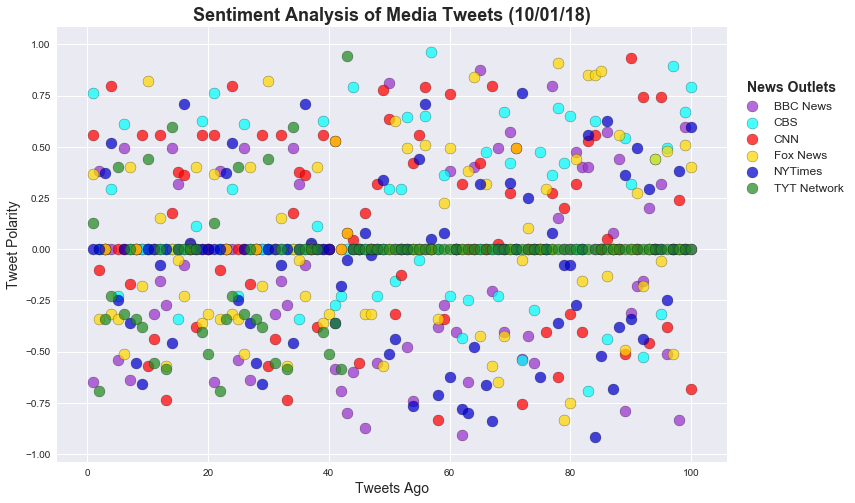

In [4]:
# Create separate dataframe for each news outlet to use in plot
BBCNews = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@BBCNews", :]
CBS = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@CBS", :]
CNN = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@CNN", :]
FoxNews = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@FoxNews", :]
NYTimes = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@nytimes", :]
TYTNetwork = News_sentiments_df.loc[News_sentiments_df["News Outlet"] == "@TYTNetwork", :]

# Create plots for each news outlet
plt.figure(figsize=(12, 8))
plt.scatter(BBCNews['Tweets Ago'], BBCNews['Compound'], s = 120, marker="o", color="DarkOrchid", edgecolors="black", alpha = .72, label='BBC News')
plt.scatter(CBS['Tweets Ago'], CBS['Compound'], s = 120, marker="o", color="Cyan", edgecolors="black", alpha = .72, label='CBS')
plt.scatter(CNN['Tweets Ago'], CNN['Compound'], s = 120, marker="o", color="red", edgecolors="black", alpha = .72, label='CNN')
plt.scatter(FoxNews['Tweets Ago'], FoxNews['Compound'], s = 120, marker="o", color="Gold", edgecolors="black", alpha = .72, label='Fox News')
plt.scatter(NYTimes['Tweets Ago'], NYTimes['Compound'], s = 120, marker="o", color="MediumBlue", edgecolors="black", alpha = .72, label='NYTimes')
plt.scatter(TYTNetwork['Tweets Ago'], TYTNetwork['Compound'], s = 120, marker="o", color="ForestGreen", edgecolors="black", alpha = .72, label='TYT Network')


# Create variable for todays date
todaysdate = time.strftime("%m/%d/%y")

# Title and labels for plot
plt.title(("Sentiment Analysis of Media Tweets " + "(" + todaysdate + ")"), fontweight="bold", fontsize = 18)
plt.xlabel("Tweets Ago", fontsize = 14)
plt.ylabel("Tweet Polarity", fontsize = 14)

# Create legend for plot
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.19, 0.9), title='News Outlets', fontsize = 12)
legend.get_title().set_fontsize('14')
legend.get_title().set_fontweight('bold')

# Save plot as PNG
plt.savefig(output_scatter_file, bbox_inches="tight")

plt.show()

In [5]:
# Group by news outlet and get average for overall sentiment
News_sentiments_gb = News_sentiments_df.groupby(['News Outlet']).mean()

News_sentiments_gb

,Compound,Positive Score,Negative Score,Neutral Score,Tweets Ago
News Outlet,,,,,
@BBCNews,-0.067791,0.07092,0.11101,0.81808,50.5
@CBS,0.117586,0.08230,0.03228,0.88543,50.5
@CNN,0.083677,0.08799,0.05821,0.85385,50.5
@FoxNews,0.031013,0.09946,0.08182,0.81871,50.5
@TYTNetwork,-0.055688,0.02992,0.05368,0.91643,50.5
@nytimes,-0.068845,0.05260,0.07830,0.86911,50.5


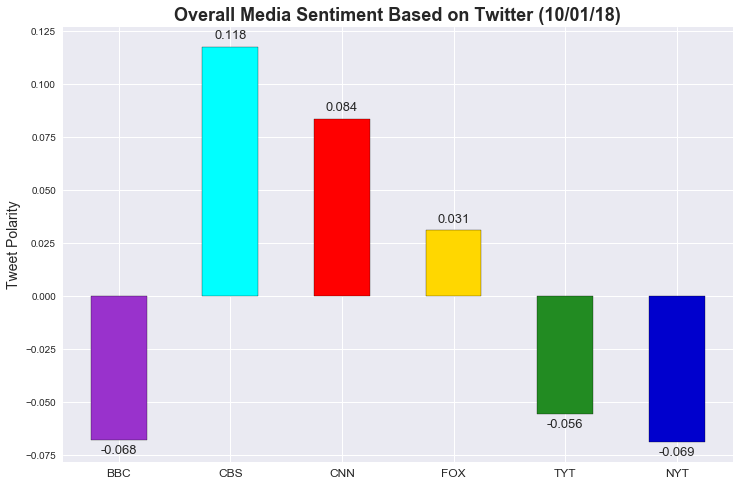

In [6]:
# Create variable for Compount average 
Compound_Sentiment = News_sentiments_gb['Compound']

# List X lables 
x_labels = ['BBC', 'CBS', 'CNN', 'FOX', 'TYT', 'NYT']

# Set bar colors
plot_colors = ["DarkOrchid", "Cyan", "red", "Gold", "ForestGreen", "MediumBlue"]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = Compound_Sentiment.plot(kind='bar', color = plot_colors, edgecolor='black' )

# Plot title and Y label 
plt.title(("Overall Media Sentiment Based on Twitter " + "(" + todaysdate + ")"), fontweight="bold", fontsize = 18)
plt.ylabel("Tweet Polarity", fontsize = 14)

# Rotate X labels horizontal and remove x axis title for aesthetics 
ax.set_xticklabels(x_labels, rotation=360, fontsize = 12)
plt.xlabel('')

# Variable to hold bar shape 
rectangles = ax.patches

# loop through bars and add value 
for rectangle in rectangles:
    
    # Get X and Y placement of label from rect.
    y_value = rectangle.get_height()
    x_value = rectangle.get_x() + rectangle.get_width() / 2

    # Number of points between bar and label.
    space = 5
    
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.3f}".format(y_value)

    # Create annotation for each bar
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),
        size=13,
        textcoords="offset points", 
        ha='center',                
        va=va)                  

# save figure as PNG
plt.savefig(output_Overall_Sentiment, bbox_inches="tight")

plt.show()